# **Netflix Movies and TV Shows – Exploratory Data Analysis**
An in-depth exploratory analysis of Netflix's movie and TV show catalog using Python, Pandas, and Seaborn. The goal is to uncover trends, patterns, and insights related to content type, duration, genres, ratings, and more.

---

## 1. Load and Inspect Dataset
- Load the Netflix dataset
- View basic structure and shape
- Check for duplicates and missing values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/dataset/netflix_titles.csv')

In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."




---



###**Data Viewing**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3




---



---
## 2. Data Cleaning
- Handle missing values in columns like `director`, `cast`, `country`, `rating`, and `duration`
- Convert `date_added` to datetime format
- Drop unnecessary columns like `description`


In [ ]:
#filling all the null values with "unknown"
col =['director','cast','country','rating','duration']
df[col] = df[col].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
#dropping the description column as it is not needed
df.drop('description',axis=1,inplace=True)



---



---
## 3. Feature Engineering
- Convert `date_added` to datetime format
- Extract `year_added` from `date_added`
- Create new `genre` column from `listed_in`
  

In [ ]:
#some dates had extra spaces
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021




---



###**Genre Splitting**

In [ ]:
#splitting the grouped genres to single genre

df['genre'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre')
df_exploded['genre']
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,"[International TV Shows, TV Dramas, TV Mysteries]"




---



---
## 4. Visual Analysis

###**Content Type Distribution**

####*Count Plot of Movies vs TV Shows*

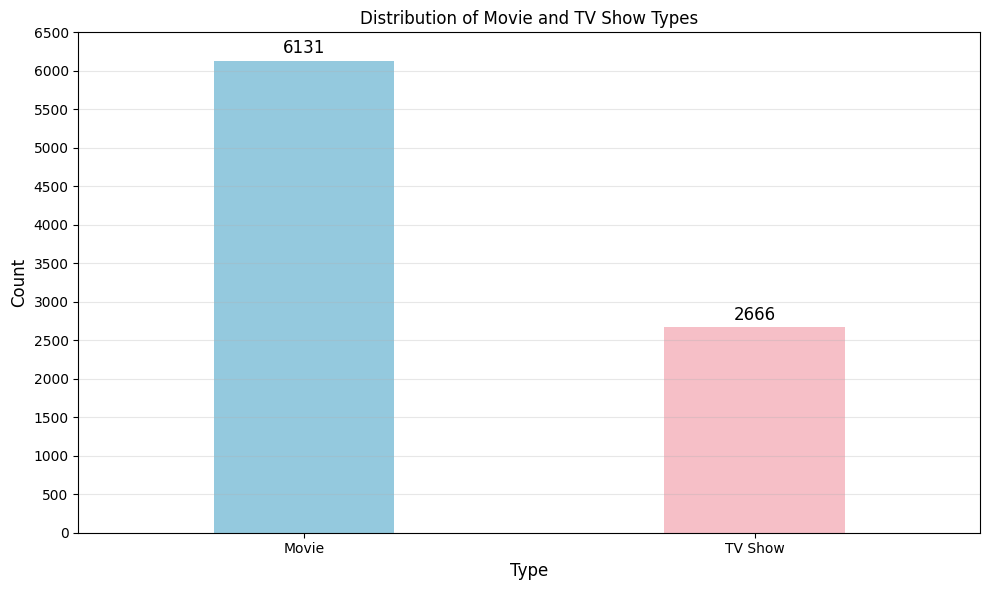

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type',palette={'Movie': 'skyblue', 'TV Show': 'lightpink'},hue='type',width=0.4)
plt.title('Distribution of Movie and TV Show Types')
plt.yticks(np.arange(0, 7000, 500))
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Type',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

for i, count in enumerate(df['type'].value_counts()):
    plt.text(i,count+100,count,ha = 'center',fontsize = 12)
plt.tight_layout()
plt.show()

####*Pie Chart of Type Distribution*

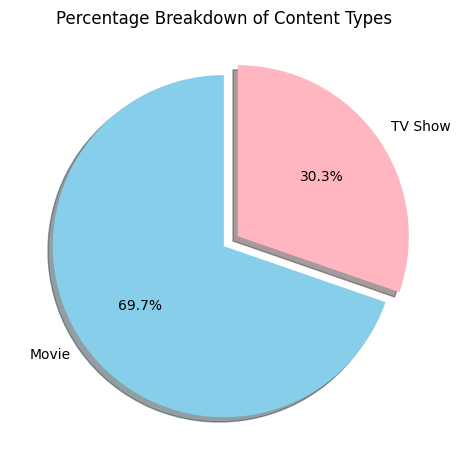

In [ ]:
plt.pie(df['type'].value_counts(),labels = df['type'].value_counts().index,autopct = '%1.1f%%',startangle = 90,colors=['skyblue', 'lightpink'],explode = [0,0.1],shadow = True)
plt.title('Percentage Breakdown of Content Types')
plt.tight_layout()
plt.show()



---



###**Titles Added Over Time**

####*Titles added per year*

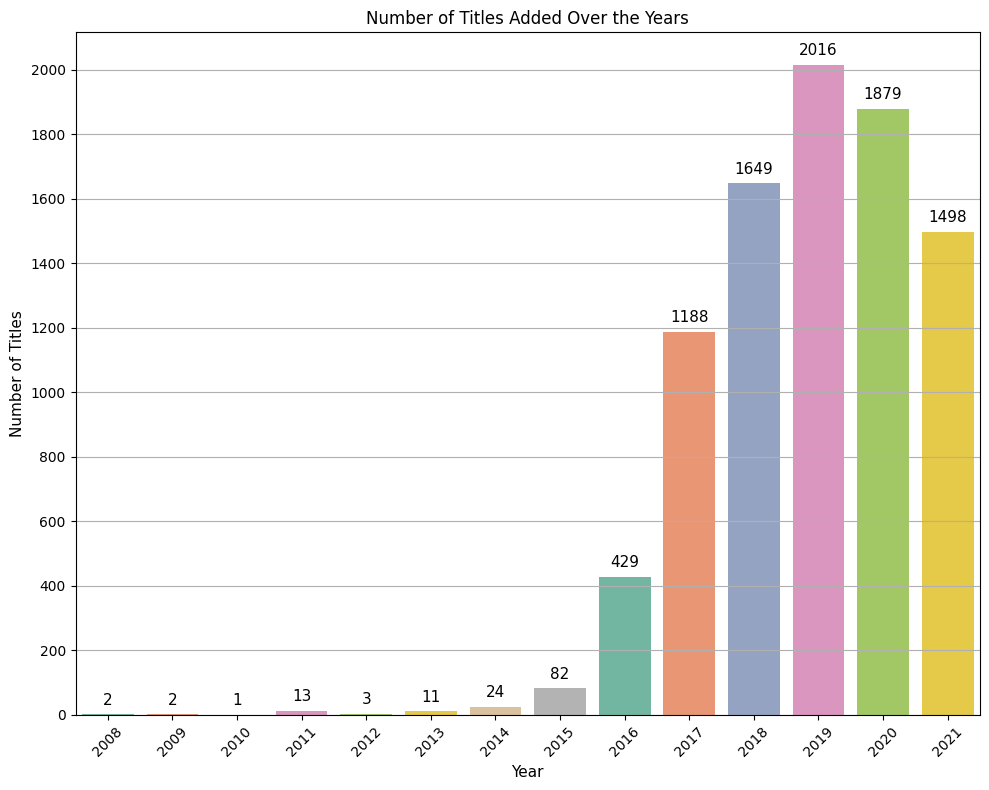

In [ ]:
titles = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
sns.barplot(x = titles.index,y = titles.values,palette='Set2',hue=titles.index,legend=False)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 2002, 200))
plt.grid(axis='y')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year',fontsize = 11)
plt.ylabel('Number of Titles',fontsize = 11)
for i, count in enumerate(titles.values):
  plt.text(i,count+30,count,ha = 'center',fontsize = 11)
plt.tight_layout()
plt.show()

####*Stacked bar and line plots for Movies vs TV Shows*

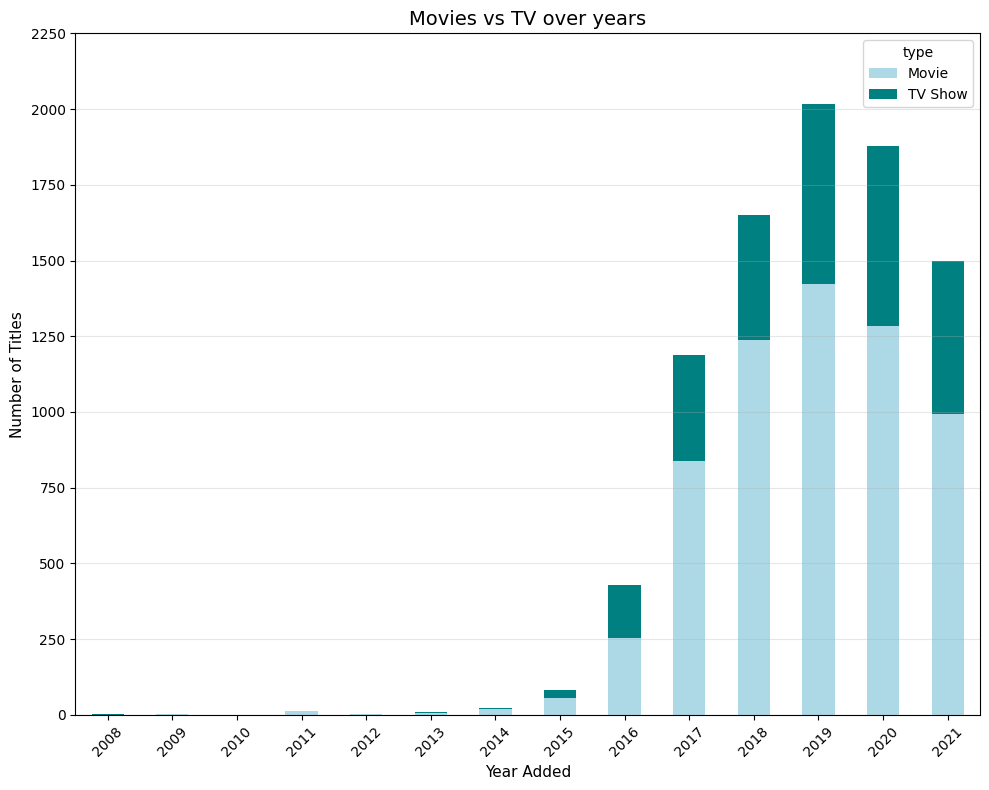

In [ ]:
type_year = df.groupby(['year_added','type']).size()
type_year = type_year.unstack().fillna(0)
type_year.plot(kind='bar',stacked=True, figsize=(10, 8),color=['lightblue', 'teal'])
plt.xlabel('Year Added',fontsize= 11 )
plt.ylabel('Number of Titles',fontsize= 11)
plt.title('Movies vs TV over years',fontsize= 14)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 2260, 250))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


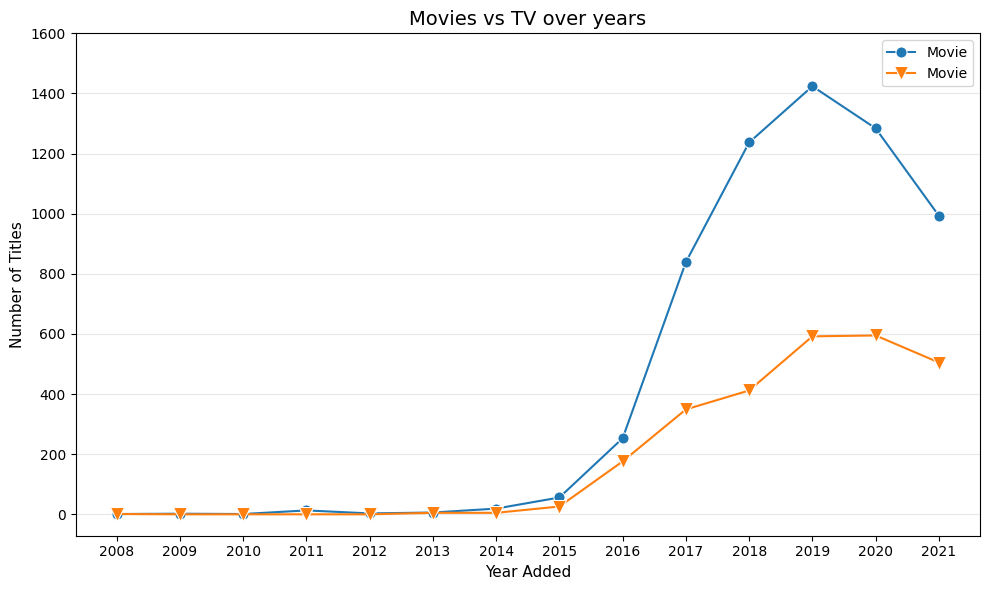

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=type_year.index, y=type_year['Movie'],label = 'Movie', marker = 'o',markersize =8)
sns.lineplot(x=type_year.index, y=type_year['TV Show'],label = 'Movie', marker = 'v',markersize = 10)
plt.xlabel('Year Added',fontsize= 11 )
plt.ylabel('Number of Titles',fontsize= 11)
plt.yticks(np.arange(0,1610,200))
plt.xticks(np.arange(2008,2022,1))
plt.grid(axis='y', alpha=0.3)
plt.title('Movies vs TV over years',fontsize= 14)
plt.tight_layout()
plt.show()



---



###**Rating Analysis**

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,"[International TV Shows, TV Dramas, TV Mysteries]"


In [ ]:
print(df['rating'].unique())
#dropping the weird ratings
valuess = ['66 min','74 min','84 min','Unknown']
df = df[~df['rating'].isin(valuess)]
df['rating'].unique()

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR']


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)



---



####**Rating Distribution**

####*Count plot of ratings*

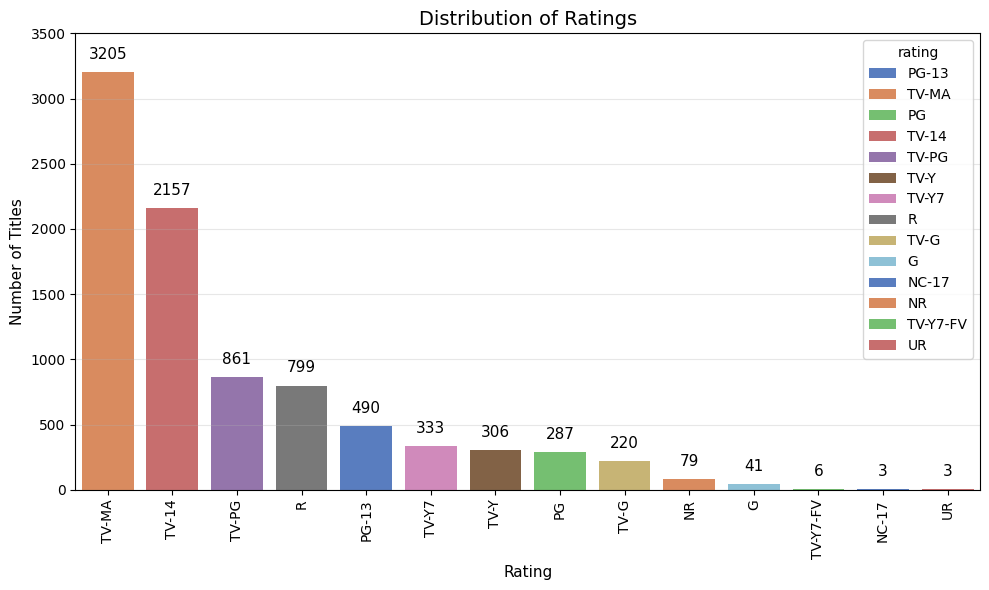

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating',data=df,palette='muted',order = df['rating'].value_counts().index,hue='rating', legend=True)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,3600,500))
plt.xlabel('Rating',fontsize = 11)
plt.ylabel('Number of Titles',fontsize = 11)
plt.title('Distribution of Ratings',fontsize = 14)
plt.grid(axis='y', alpha=0.3)
for i, count in enumerate(df['rating'].value_counts()):
  plt.text(i,count+100,count,ha = 'center',fontsize = 11)
plt.tight_layout()
plt.show()

####*Side-by-side comparison for Movies vs TV Shows*

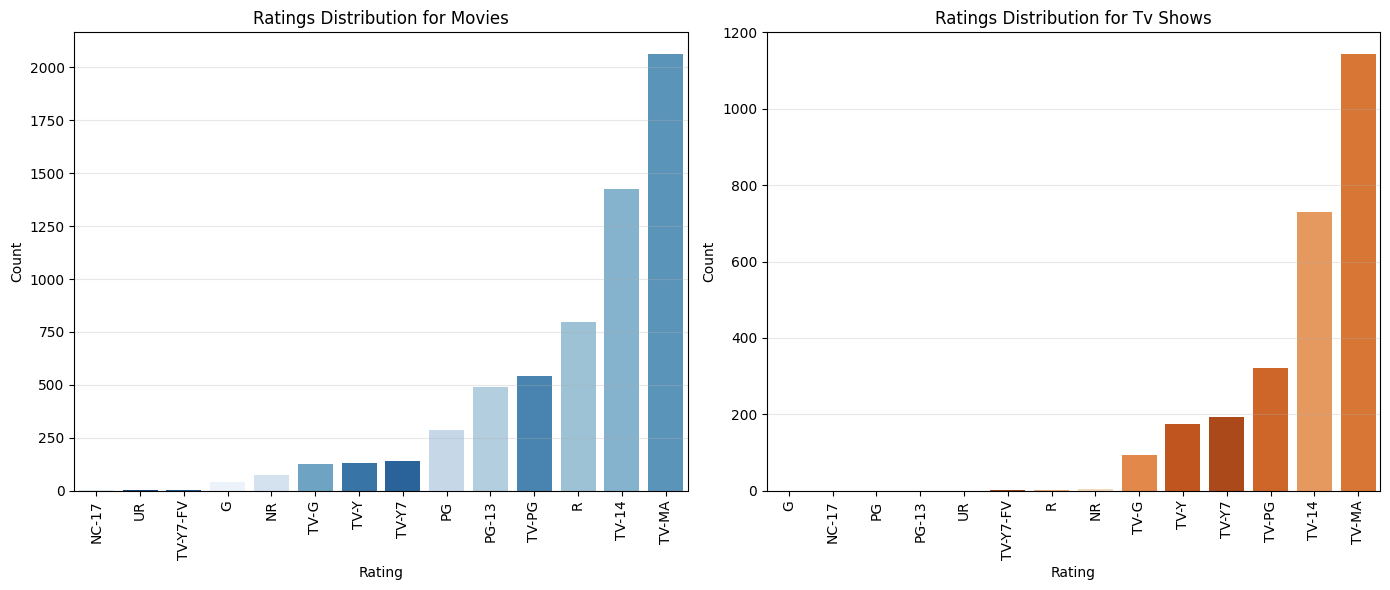

In [ ]:

#One way of Ratings for Movies only vs TV Shows only
# df.head(2)
# grouped = df.groupby([df['rating'],df['type']]).size().reset_index(name='count')
# grouped
# plt.figure(figsize=(12, 6))
# sns.barplot(x='rating', y='count', hue='type', data=grouped, palette=['skyblue','lightpink'])
# plt.xlabel('Rating')
# plt.ylabel('Number of Titles')
# plt.title('Ratings for Movies vs TV Shows')
# plt.grid(axis='y', alpha=0.3)
# plt.tight_layout()
# plt.show()

#Second Way
grouped = df.groupby(['rating', 'type']).size().unstack().fillna(0)
grouped
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(x='rating',y='Movie',hue='rating',data=grouped,palette='Blues',order = grouped['Movie'].sort_values().index)
plt.title('Ratings Distribution for Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1,2,2)
sns.barplot(x='rating',y='TV Show',hue='rating',data=grouped,palette='Oranges',order = grouped['TV Show'].sort_values().index)
plt.title('Ratings Distribution for Tv Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



---



###**Genre Analysis**



####*Top Ten Genres*

In [ ]:
df.head(2)
genre = df['genre'].explode()
top_genres = genre.value_counts().head(10)

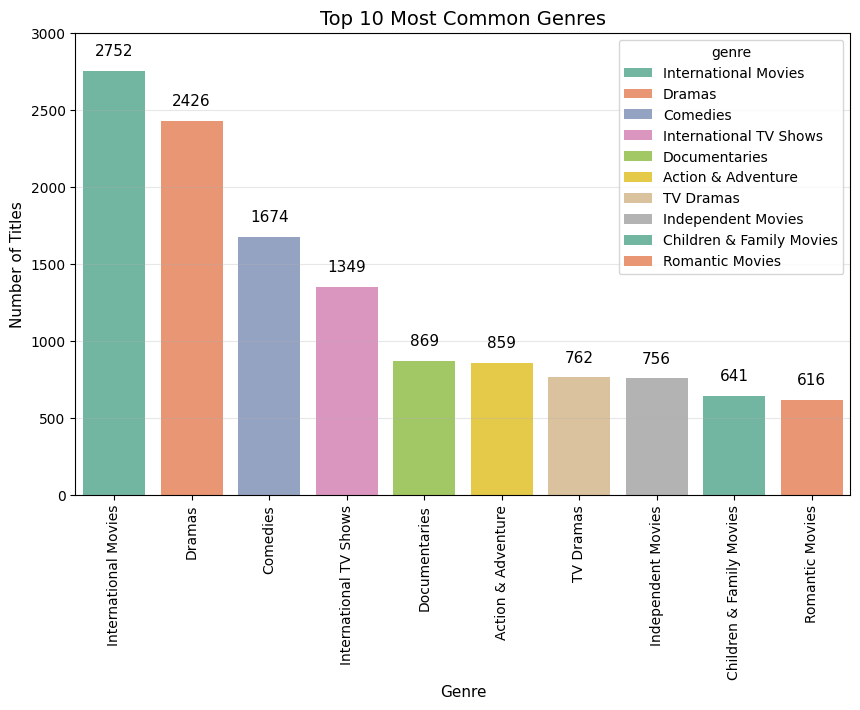

In [ ]:
top_genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set2',hue = top_genres.index, legend = True)
plt.xlabel('Genre',fontsize = 11)
plt.ylabel('Number of Titles',fontsize = 11)
plt.title('Top 10 Most Common Genres',fontsize = 14)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,3100,500))
plt.grid(axis='y', alpha=0.3)
for i, count in enumerate(top_genres.values):
  plt.text(i,count+100,count,ha = 'center',fontsize = 11)
plt.show()



---



###**Country-wise Insights**

####*Top Ten Countries Producing Content*

In [ ]:
df.head()
#removing the unknown countries
df = df[df['country']!='Unknown']
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,"[International TV Shows, TV Dramas, TV Mysteries]"


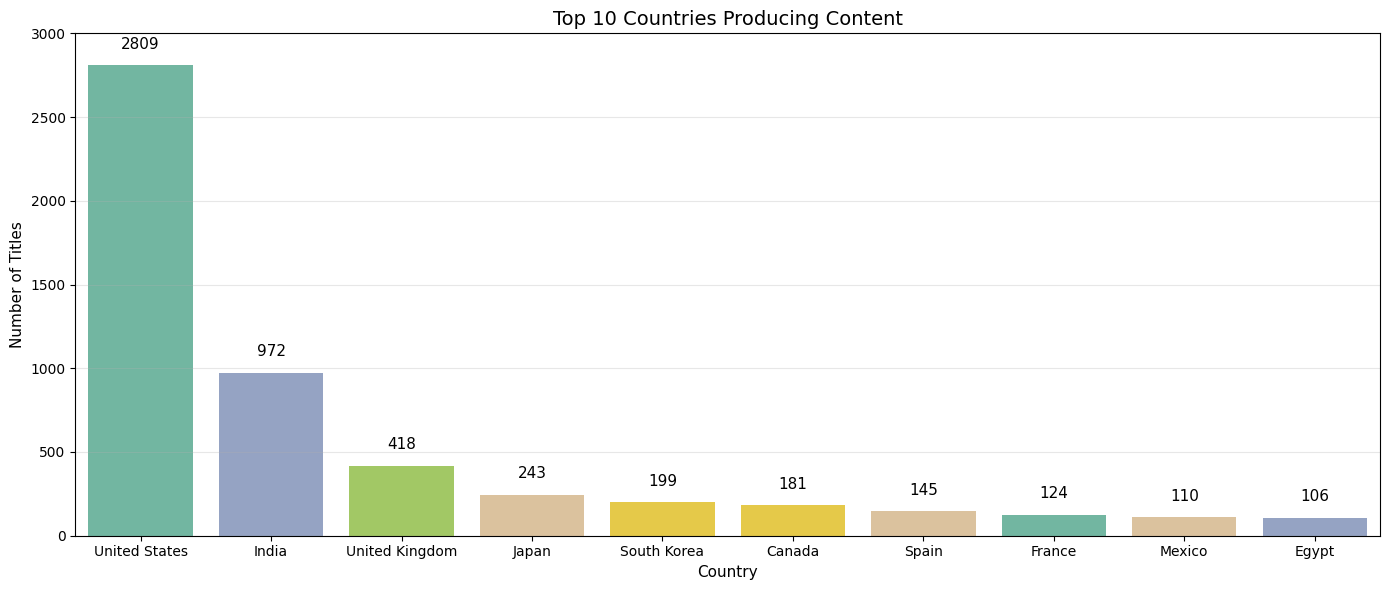

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='country',hue='country',data=df,palette='Set2',order = df['country'].value_counts().head(10).index)
plt.yticks(np.arange(0,3100,500))
plt.xlabel('Country',fontsize = 11)
plt.ylabel('Number of Titles',fontsize = 11)
plt.title('Top 10 Countries Producing Content',fontsize = 14)
plt.grid(axis='y', alpha=0.3)
for i, count in enumerate( df['country'].value_counts().head(10).values):
  plt.text(i,count+100,count,ha = 'center',fontsize = 11)
plt.tight_layout()
plt.show()


####*Line plot for movies from India and US over time*

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,"[International TV Shows, TV Dramas, TV Mysteries]"


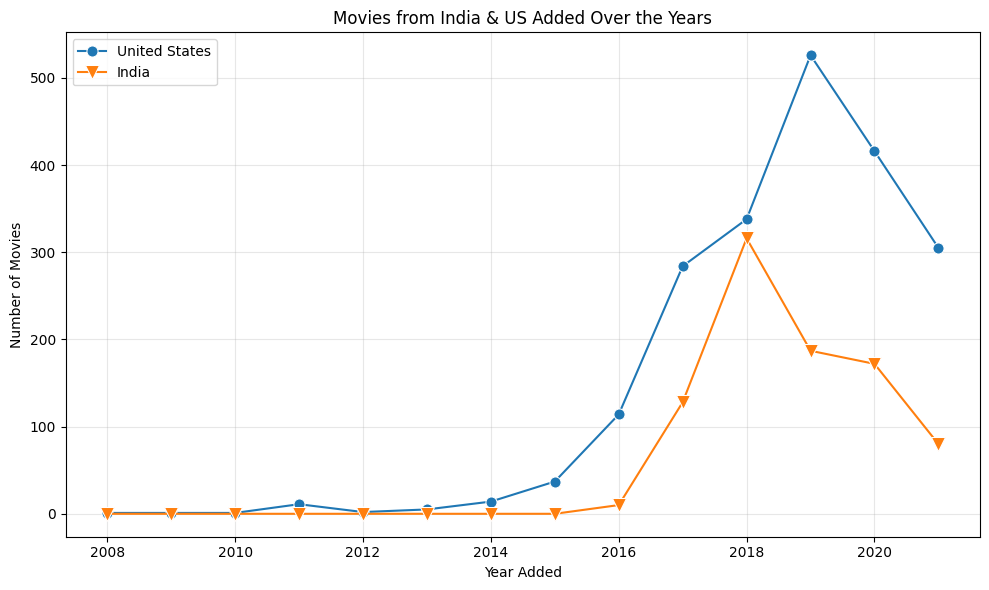

In [ ]:
filter = df[(df['type']=='Movie') & (df['country'].isin(['India','United States']))]
filter
movies_year = filter.groupby(['year_added','country']).size().unstack().fillna(0)
movies_year
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_year.index,y= movies_year['United States'].values,label = 'United States', marker = 'o',markersize =8)
sns.lineplot(x=movies_year.index,y = movies_year['India'].values,label = 'India', marker = 'v',markersize = 10)
plt.title('Movies from India & US Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



---



###**Creators**

####*Most frequent directors on Netflix*

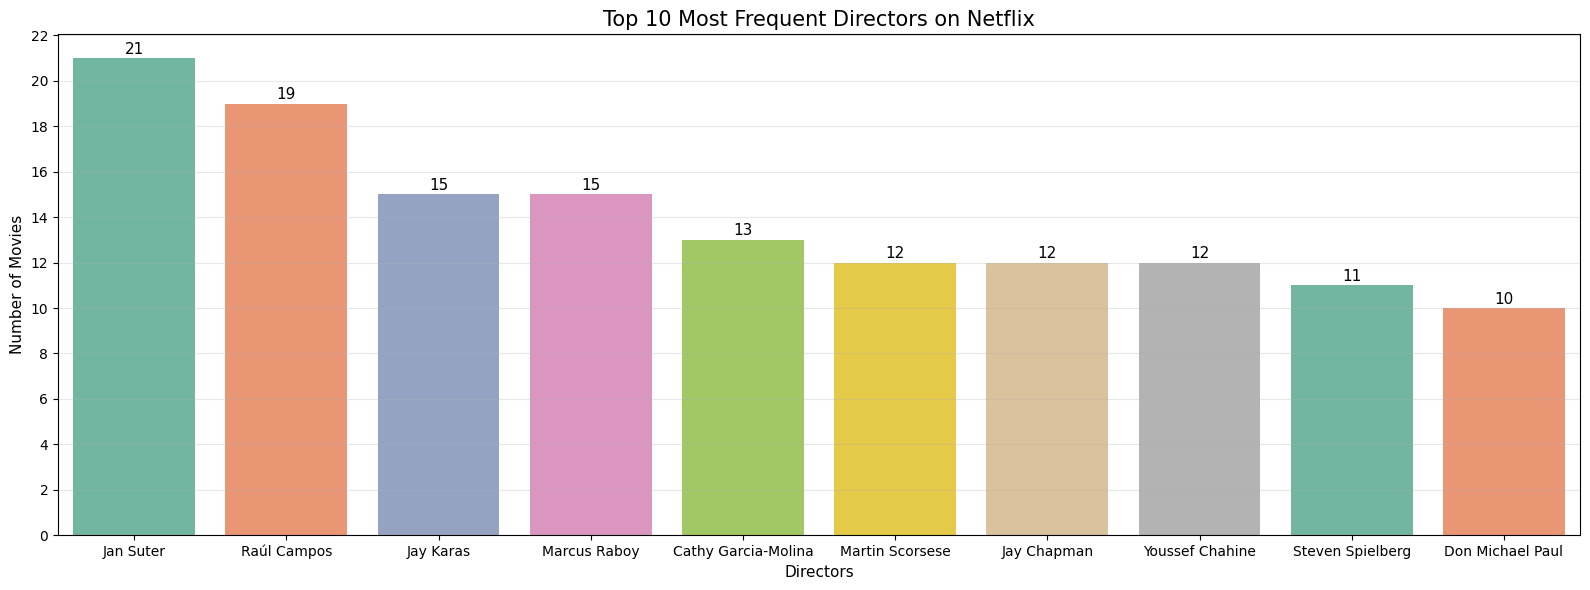

In [ ]:
df.head(2)
#removing all the unknown directors
df = df[df['director']!='Unknown']
df.head(2)
directors = df['director'].dropna().str.split(', ')
directors = directors.explode()
top10_dir = directors.value_counts().head(10)
plt.figure(figsize=(16,6))
sns.barplot(x=top10_dir.index,y=top10_dir.values,palette='Set2',hue=top10_dir.index,order = top10_dir.sort_values(ascending=False).index)
plt.title('Top 10 Most Frequent Directors on Netflix',fontsize = 15)
plt.xlabel('Directors',fontsize = 11)
plt.ylabel('Number of Movies',fontsize = 11)
plt.grid(axis='y', alpha=0.3)
plt.yticks(np.arange(0,23,2))
for i, count in enumerate(top10_dir.sort_values(ascending=False)):
  plt.text(i,count+0.2,count,ha = 'center',fontsize = 11)
plt.tight_layout()
plt.show()


####*Most common cast members*

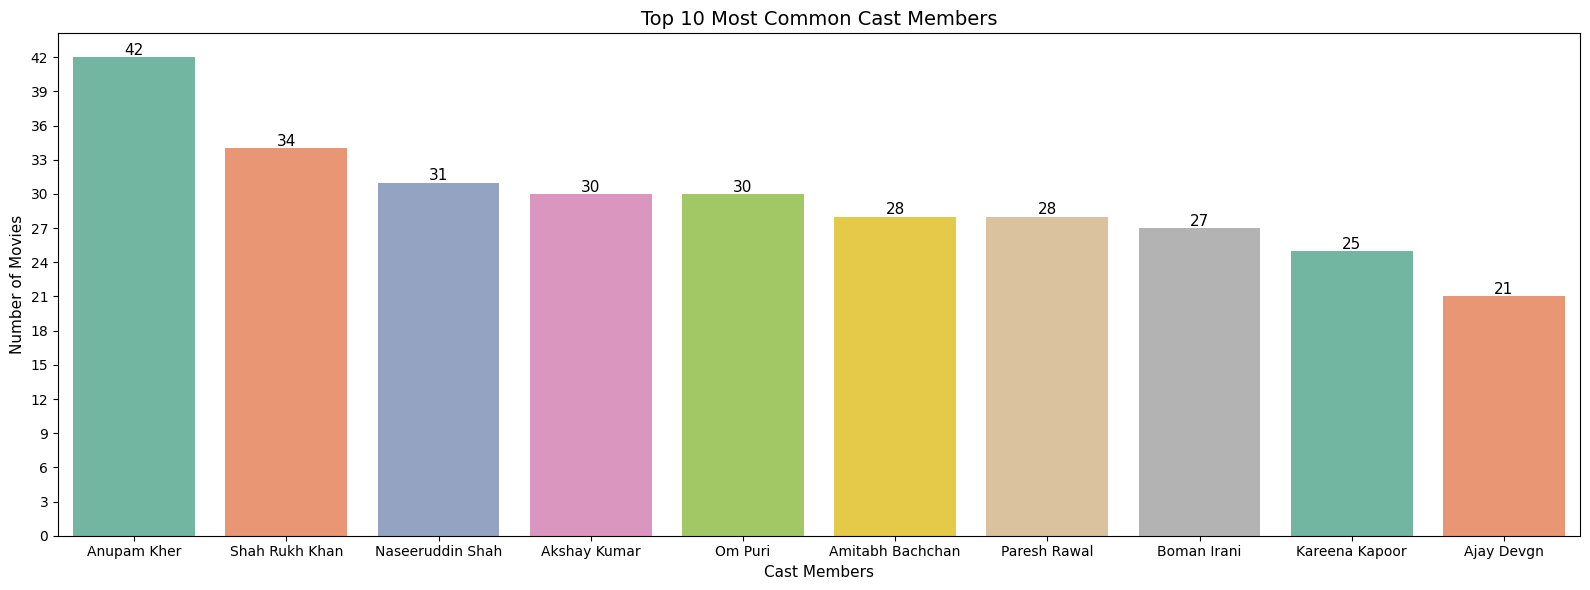

In [ ]:
#removing unknown cast
df = df[df['cast']!='Unknown']
#had to split the cast from group to individuals
cast = df['cast'].str.split(', ')
cast = cast.explode()
Common_Cast = cast.value_counts().head(10)
plt.figure(figsize=(16,6))
sns.barplot(x=Common_Cast.index,y=Common_Cast.values,palette='Set2',hue=Common_Cast.index)
plt.yticks(np.arange(0,43,3))
plt.xlabel('Cast Members',fontsize = 11)
plt.ylabel('Number of Movies',fontsize = 11)
plt.title('Top 10 Most Common Cast Members',fontsize = 14)
for i ,count in enumerate(Common_Cast.values):
  plt.text(i,count+0.2,count,ha = 'center',fontsize = 11)
plt.tight_layout()
plt.show()



---



###**Duration Analysis**

####*Splitting Movie durations and TV Show seasons*

In [ ]:
df.head(2)
movies = df[df['type']=='Movie'].copy()
series = df[df['type']=='TV Show'].copy()
movies
#converting string to duration
movies['duration']=movies['duration'].str.extract('(\d+)').astype(float)
series['duration'] = series['duration'].str.extract('(\d+)').astype(int)

####*Duration Distribution of Movies and TV Shows*

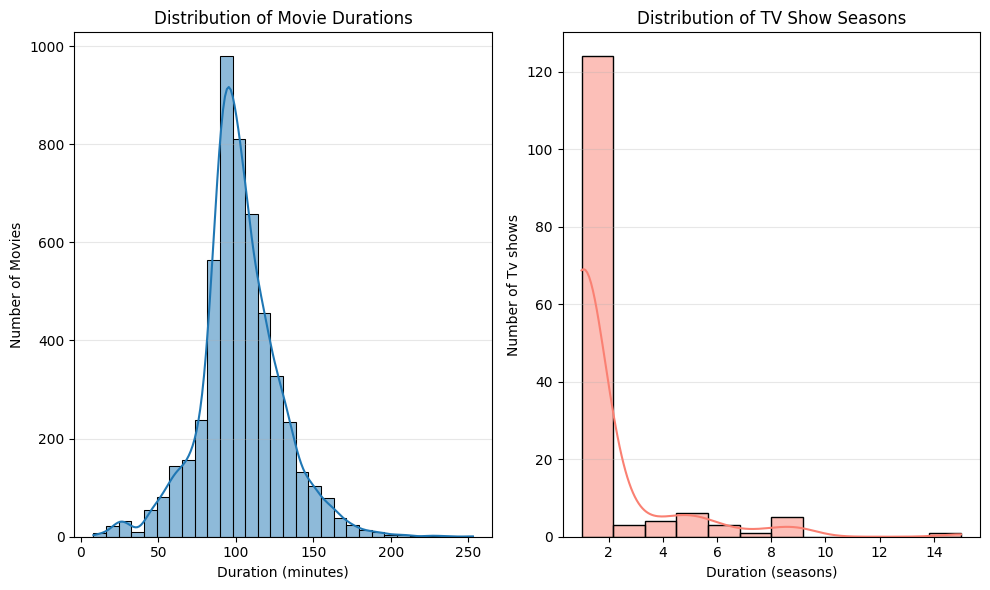

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.3)
plt.subplot(1,2,2)
sns.histplot(series['duration'], bins=int(np.sqrt(len(series))), kde=True, color='salmon')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Duration (seasons)')
plt.ylabel('Number of Tv shows')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



---



---
## 5. Summary

Here are the key findings from the exploratory data analysis:

- 🔹 **Content Type**: Movies dominate Netflix's catalog, making up the majority of available titles.
- 📈 **Trends Over Time**: A sharp increase in content additions around 2017–2020, with a slight drop in recent years.
- 🌍 **Countries**: The United States is the top content producer, followed by India, UK, and Canada.
- 🎬 **Genres**: 'Dramas', 'Comedies', and 'Documentaries' are the most common genres across both Movies and TV Shows.
- 🔞 **Ratings**: TV-MA and TV-14 are the most frequent ratings, indicating a large share of content aimed at mature audiences.
- 🎥 **Directors**: Raúl Campos and Jan Suter are among the most frequent directors featured on the platform.
- ⭐ **Actors**: Standout frequent cast members include Anupam Kher, Shah Rukh Khan, and others from Bollywood.
- ⏱ **Durations**: Most movies fall under the 90–120 minute range, while TV Shows are mostly limited series with 1–2 seasons.

### Interesting Patterns:
- 📊 A large portion of content was added in 2019–2020, likely reflecting Netflix’s global expansion and production boom.
- 🇮🇳 India and the US show different patterns of content addition—India’s contributions have steadily grown over time.
- 👀 TV Shows tend to cluster in mature ratings (TV-MA), suggesting adult-themed serial content is in demand.

These insights can help understand Netflix’s content strategy, user preferences, and areas with room for growth (e.g., underrepresented genres or countries).


---
#**THE END**